# Data Analysis Project


**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?

* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

## 1. Import dependencies

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.api as sm

## 2. Get the data

In [205]:
# Import the data from scikit learn library
boston_data = pd.read_csv("https://github.com/scikit-learn/scikit-learn/raw/main/sklearn/datasets/data/boston_house_prices.csv", header = 1)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [191]:
boston_data.to_csv("boston-housing-data.csv")

## 3. Getting to know about the data

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [126]:
# How does the data look mathematically?
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [127]:
# What are the dataypes and total entries in the data?
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [128]:
# Are there any null values?
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [129]:
# Are there any duplicate values?
boston_data.duplicated().sum()

0

In [130]:
# How is the correlation between columns?
boston_data.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

## 4. Generate Descriptive Statistics and Visualizations

### 4.1 Boxplot of Median Value of Owner Occupied Homes

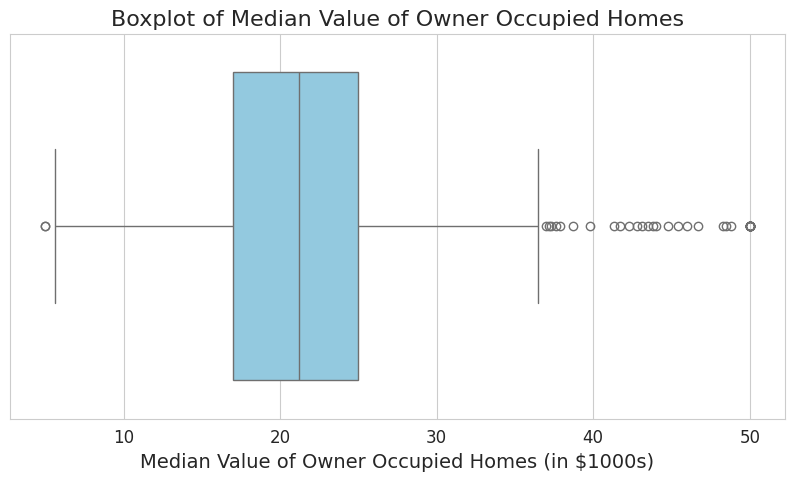

In [131]:
# Let's generate a boxplot to find the median value of owner occupied homes
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 5))

# Create the boxplot
sns.boxplot(x=boston_data['MEDV'], color='skyblue')

# Add labels and a title
plt.xlabel('Median Value of Owner Occupied Homes (in $1000s)', fontsize=14)
plt.title('Boxplot of Median Value of Owner Occupied Homes', fontsize=16)

# Customize the ticks on the x-axis
plt.xticks(fontsize=12)

# Show the plot
plt.show()

### 4.2 A Bar Plot for the Charles River Variable

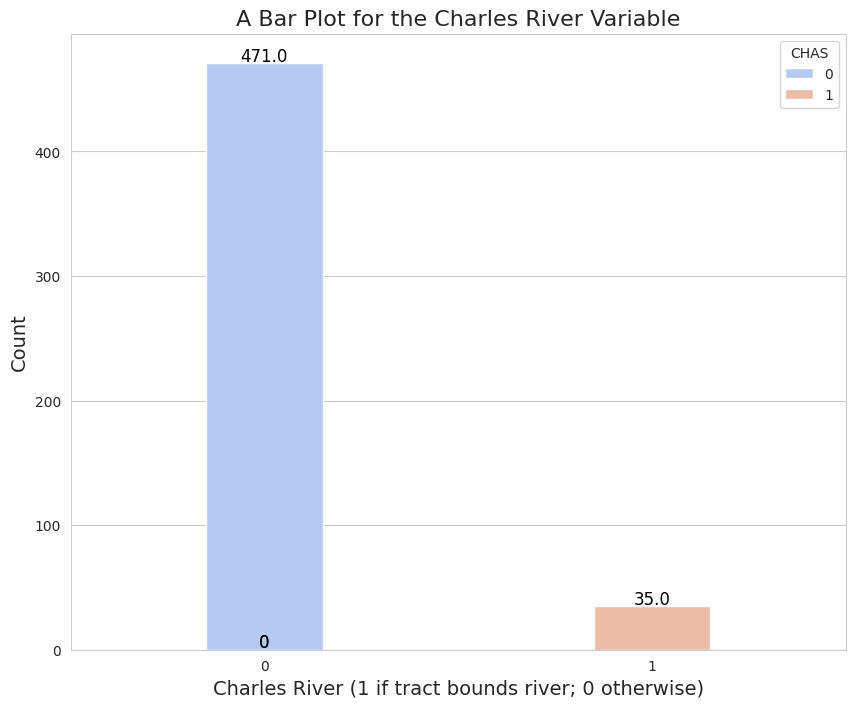

In [167]:
# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='CHAS', data=boston_data, hue = 'CHAS', palette='coolwarm', width = 0.3)

# Add labels and title
plt.xlabel("Charles River (1 if tract bounds river; 0 otherwise)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("A Bar Plot for the Charles River Variable", fontsize=16)

# Add count annotations on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


### 4.3 Boxplot of MEDV vs. AGE Group

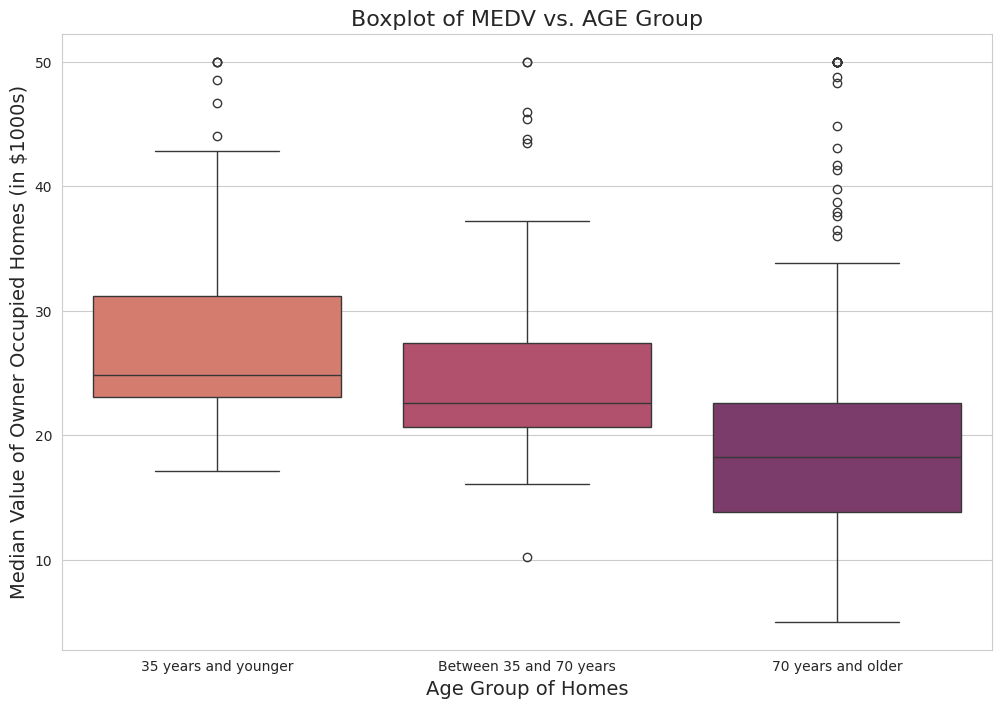

In [189]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_data['AGE_group'] = pd.cut(boston_data['AGE'], bins=bins, labels=labels)

# Create the boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_data, hue = 'AGE_group', palette='flare')

# Add labels and title
plt.xlabel('Age Group of Homes', fontsize=14)
plt.ylabel('Median Value of Owner Occupied Homes (in $1000s)', fontsize=14)
plt.title('Boxplot of MEDV vs. AGE Group', fontsize=16)

# Show the plot
plt.show()

### 4.4 Scatter Plot of NOX vs. INDUS

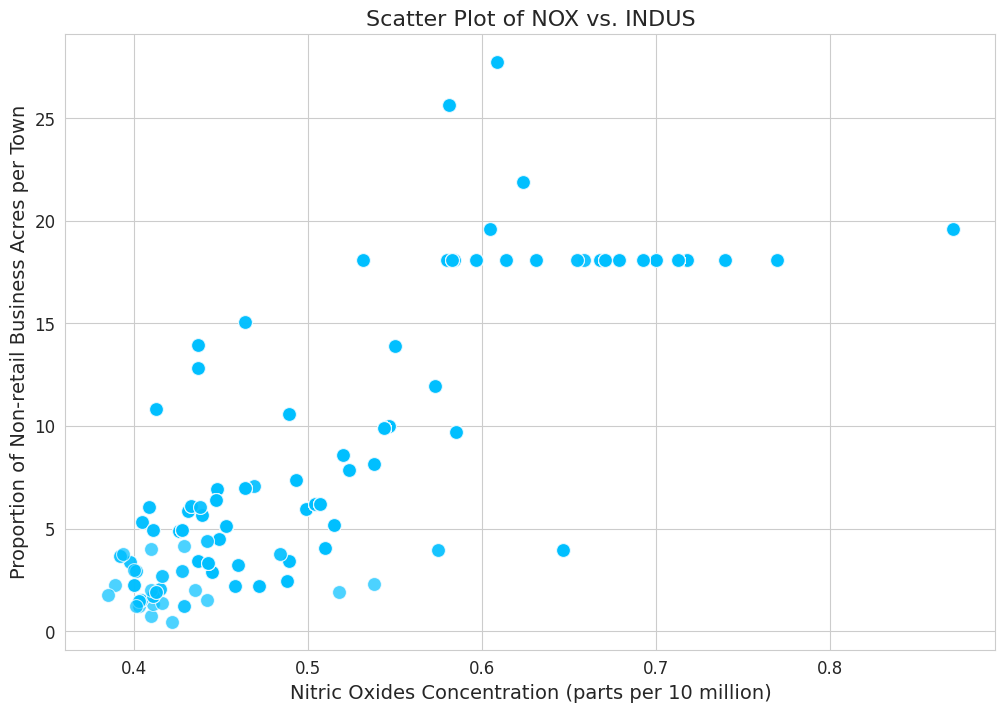

In [134]:
# Plot a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x='NOX', y='INDUS', data=boston_data, s=100, color='deepskyblue', edgecolor='w', alpha=0.7)

# Add labels and a title
plt.xlabel('Nitric Oxides Concentration (parts per 10 million)', fontsize=14)
plt.ylabel('Proportion of Non-retail Business Acres per Town', fontsize=14)
plt.title('Scatter Plot of NOX vs. INDUS', fontsize=16)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

#### 4.4.1 Analysis of NOX vs. INDUS Scatter Plot

The scatter plot shows a positive relationship between the concentration of nitric oxides (NOX) and the proportion of non-retail business acres per town (INDUS). This indicates that towns with a higher proportion of non-retail business acres tend to have higher concentrations of nitric oxides.

This trend suggests that industrial and commercial activities, which are typically associated with non-retail business acres, may contribute to increased NOX emissions. The relationship highlights the potential impact of industrial activities on air quality.

However, the plot also shows some dispersion in the data, indicating that other factors may influence NOX concentrations. Further investigation into these factors would be necessary to fully understand the causes of variability in NOX levels across different towns.


### 4.5 Distribution of Pupil to Teacher Ratio

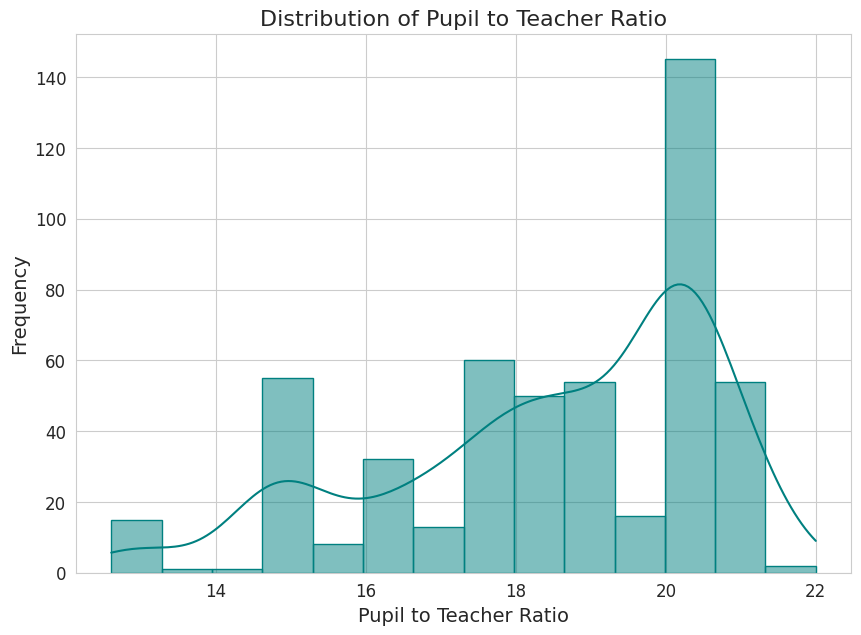

In [135]:
# Create the histogram with KDE
plt.figure(figsize=(10, 7))
ax = sns.histplot(boston_data['PTRATIO'], bins='auto', kde=True, color = 'teal', edgecolor='teal', linewidth=1)

# Add labels and a title
plt.xlabel('Pupil to Teacher Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Pupil to Teacher Ratio', fontsize=16)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Enhance the overall appearance
plt.grid(True)

# Show the plot
plt.show()

## 5. Use the appropriate tests to answer the questions provided

### 5.1 Is there a significant difference in median value of houses bounded by the Charles river or not?

#### State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("**there is no difference** in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("**there is a difference** in median value of houses bounded by the Charles river")


We will be performing 2 tests:
1. Levene's test - Levene's test is used to assess the equality of variances for a variable calculated for two or more groups.
2. T-Test - A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other

#### Interpretation

**Levene's Test Result:**

* P-value >= 0.05: Variances are equal, proceed with standard t-test.
* P-value < 0.05: Variances are not equal, proceed with Welch's t-test.

**T-test Result:**

* P-value < 0.05: There is a significant difference in the median value of houses bounded by the Charles River.
* P-value >= 0.05: There is no significant difference in the median value of houses bounded by the Charles River.

In [136]:
### LEVENE TEST ###
# Let's perform Levene's test to check test significance
parameter_1 = boston_data[boston_data['CHAS'] == 1]['MEDV']
parameter_2 = boston_data[boston_data['CHAS'] == 0]['MEDV']

levene_stat, levene_p_value = stats.levene(parameter_1, parameter_2, center = 'mean')
print(f"Levene's Statistics: {round(levene_stat, 6)}")
print(f"Levene's P-Value : {round(levene_p_value, 6)}")

### T-TEST ###
# Perform the independent t-test (Welch's t-test if variances are unequal)
if levene_p_value >= 0.05:
  print("\nP-value >= 0.05: Variances are equal, proceed with standard t-test.")
  t_stat, t_p_value = stats.ttest_ind(parameter_1, parameter_2, equal_var=True)
else:
  print("\nP-value < 0.05: Variances are not equal, proceed with Welch's t-test.")
  t_stat, t_p_value = stats.ttest_ind(parameter_1, parameter_2, equal_var=False)

print(f"\nIndependent t-test statistic: {round(t_stat, 6)}")
print(f"Independent t-test p-value: {round(t_p_value, 6)}")


Levene's Statistics: 8.751905
Levene's P-Value : 0.003238

P-value < 0.05: Variances are not equal, proceed with Welch's t-test.

Independent t-test statistic: 3.113291
Independent t-test p-value: 0.003567


#### **Conclusion of T test:**

With a *p-value* of `0.003567` from the Welch's t-test, which is less than the typical significance level of 0.05, **we reject the null hypothesis**.

Therefore, we can conclude that there is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the river.

### 5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

#### State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ : The three population **medians are equal**
*   $H\_1:$ At least one of **the medians differ**

We discretized our data into 3 age groups stored in the column `AGE_group` with age groups:
* 35 years and younger
* Between 35 and 70 years
* 70 years and older



In [137]:
### LEVENE TEST ###
# Test for equality of variance
age_group1 = boston_data[boston_data['AGE_group'] == '35 years and younger']['MEDV']
age_group2 = boston_data[boston_data['AGE_group'] == 'Between 35 and 70 years']['MEDV']
age_group3 = boston_data[boston_data['AGE_group'] == '70 years and older']['MEDV']

levene_stat_age, levene_p_value_age = stats.levene(age_group1, age_group2, age_group3, center = 'mean')
print(f"Levene's Statistics: {round(levene_stat_age, 6)}")
print(f"Levene's P-Value : {round(levene_p_value_age, 6)}")

### ANOVA-TEST ###
# Check if Levene's test is significant
if levene_p_value_age >= 0.05:
    print("\nPerform standard ANOVA if variances are equal")
    anova_stat_age, anova_p_value_age = stats.f_oneway(age_group1, age_group2, age_group3)
    print(f"\nANOVA Statistic: {round(anova_stat_age, 6)}")
    print(f"ANOVA P-Value: {anova_p_value_age}")
else:
    print("\nPerform Welch's ANOVA if variances are unequal")
    welch_anova_stat_age, welch_anova_p_value_age = stats.f_oneway(age_group1, age_group2, age_group3, equal_var=False)
    print(f"\nWelch's ANOVA Statistic: {round(welch_anova_stat_age, 6)}")
    print(f"Welch's ANOVA P-Value: {welch_anova_p_value_age}")

Levene's Statistics: 2.78062
Levene's P-Value : 0.062953

Perform standard ANOVA if variances are equal

ANOVA Statistic: 36.40765
ANOVA P-Value: 1.7105011022702984e-15


#### **Conclusion of ANOVA test**

The standard ANOVA (Analysis of Variance) yielded a highly significant p-value (p < 0.001). This indicates that there is a significant difference in median values of houses (MEDV) among the different age groups (AGE_group).**We reject the null Hypothesis of equal medians**.

Based on the results of the one-way ANOVA, we found a significant difference in median values of houses (`MEDV`) among the different proportions of owner-occupied units built prior to 1940 (`AGE`) categories (`F-statistic = [36.40765], p-value = [1.7105011022702984e-15]`).

This suggests that the age of the houses has an impact on their median values.

### 5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### State the hypothesis:

*   $H\_0:$ **there is no relationship** between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ **there is a relationship** between Nitric oxide concentrations and proportion of non-retail business acres per town

#### Interpretation

* If the Pearson correlation coefficient is close to 0 (e.g., between -0.1 and 0.1), it suggests no linear relationship.
* If the p-value is greater than the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis of no correlation.

In [138]:
# Calculate Pearson correlation coefficient
pearson_corr, pearson_p_value = stats.pearsonr(boston_data['NOX'], boston_data['INDUS'])

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {pearson_p_value}")

Pearson Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98


#### **Conclusion of Pearson's Correlation**

With a Pearson correlation coefficient of approximately 0.764 and a very small p-value (close to zero), we can conclude that there is a strong positive linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In simpler terms, the data suggests that as the proportion of non-retail business acres per town increases, nitric oxide concentrations also tend to increase.

This correlation is statistically significant, indicating that it is unlikely to have occurred by random chance. Therefore, **we reject the null hypothesis of no correlation between the two variables.**

### 5.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

#### State the Hypothesis
*   $H\_0: β1$ = 0 **There is no effect** of the weighted distance to the employment centers on the median value of owner-occupied homes.
*   $H\_1: β1 \neq 0$ **There is an effect** of the weighted distance to the employment centers on the median value of owner-occupied homes.

In [140]:
# Prepare the data
X = boston_data['DIS']  # Independent variable (DIS)
y = boston_data['MEDV']  # Dependent variable (MEDV)

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.21e-08
Time:                        13:23:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

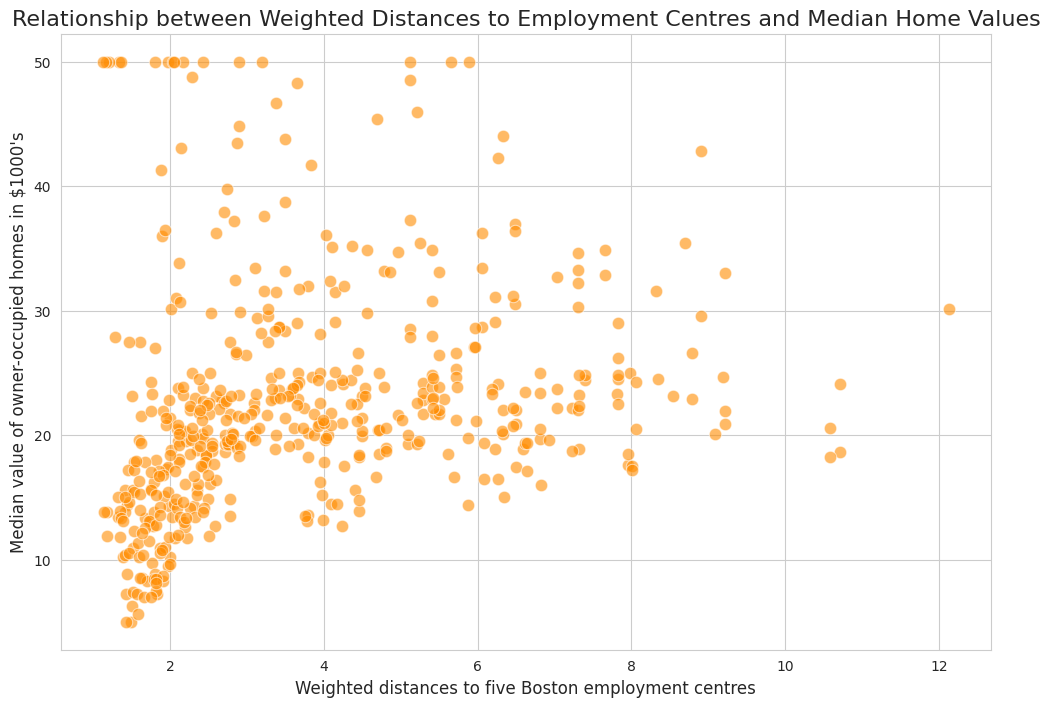

In [163]:
# Set the style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=boston_data, x='DIS', y='MEDV', color='darkorange', s = 80, alpha=0.6)

# Add labels and title
plt.xlabel('Weighted distances to five Boston employment centres', fontsize=12)
plt.ylabel("Median value of owner-occupied homes in $1000's", fontsize=12)
plt.title('Relationship between Weighted Distances to Employment Centres and Median Home Values', fontsize=16)

# Show plot
plt.show()

#### **Conclusion of the Regression Analysis**

* There is a statistically significant positive relationship between the weighted distance to the employment centers (DIS) and the median value of owner-occupied homes (MEDV). Specifically, as the weighted distance to the employment centers increases, the median value of owner-occupied homes tends to increase.

* Since the p-value is less than the chosen significance level (e.g., 0.05), **we reject the null hypothesis**. Therefore, we conclude that there is a statistically significant linear relationship between the weighted distance to the employment centers (DIS) and the median value of owner-occupied homes (MEDV).